Fractional Knapsack Problem Solution:
----------------------------
Total Capacity: 1500
Number of Iterations: 100
Best Total Value: 4475.642857142857
Total Weight of Selected Items: 1501


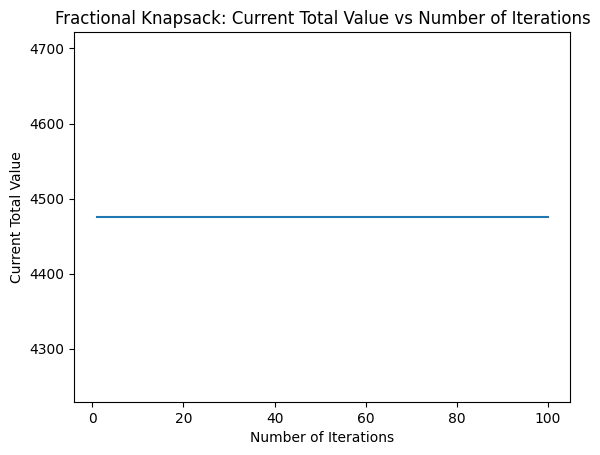

In [48]:
import csv
import random
import matplotlib.pyplot as plt

class KnapsackProblem:
    def __init__(self, weights, values, capacity):
        self.weights = weights
        self.values = values
        self.capacity = capacity
        self.num_items = len(weights)
        self.selected_items = []
        self.total_value = 0

    def calculate_value(self, selected_items):
        total_value = sum(self.values[i] for i in selected_items)
        return total_value

    def fractional_knapsack(self, num_iterations):
        current_total_values = []
        current_selected_items = []

        for _ in range(num_iterations):
            randomized_indices = random.sample(range(self.num_items), self.num_items)
            randomized_weights = [self.weights[i] for i in randomized_indices]
            randomized_values = [self.values[i] for i in randomized_indices]

            item_ratios = [(i, randomized_values[i] / randomized_weights[i]) for i in range(self.num_items)]
            item_ratios.sort(key=lambda x: x[1], reverse=True)

            current_weight = 0
            current_value = 0
            current_items = []

            for item, ratio in item_ratios:
                if current_weight + randomized_weights[item] <= self.capacity:
                    current_weight += randomized_weights[item]
                    current_value += randomized_values[item]
                    current_items.append(randomized_indices[item])
                else:
                    remaining_capacity = self.capacity - current_weight
                    fraction = remaining_capacity / randomized_weights[item]
                    current_weight += fraction * randomized_weights[item]
                    current_value += fraction * randomized_values[item]
                    current_items.append(randomized_indices[item])
                    break

            self.total_value = current_value
            self.selected_items = current_items

            current_total_values.append(self.total_value)
            current_selected_items.append(self.selected_items)

        return current_total_values, current_selected_items

def main():
    # Read data from CSV file
    weights = []
    values = []

    with open('knapsack.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header row
        for row in csv_reader:
            weights.append(int(row[0]))
            values.append(int(row[1]))

    # Set capacity for the knapsack
    capacity = 1500  # Set the desired capacity value here

    # Set the number of iterations
    num_iterations = 100  # Set the desired number of iterations here

    # Solve the fractional knapsack problem
    knapsack = KnapsackProblem(weights, values, capacity)
    current_total_values, current_selected_items = knapsack.fractional_knapsack(num_iterations)

    print("Fractional Knapsack Problem Solution:")
    print("----------------------------")
    print("Total Capacity:", capacity)
    print("Number of Iterations:", num_iterations)
    print("Best Total Value:", current_total_values[-1])
    #print("Selected Items:", current_selected_items[-1])

    # Check if capacity is maintained
    selected_weights = [weights[i] for i in current_selected_items[-1]]
    total_weight = sum(selected_weights)
    print("Total Weight of Selected Items:", total_weight)

    # Plot the current total value vs number of iterations
    plt.plot(range(1, num_iterations + 1), current_total_values)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Current Total Value")
    plt.title("Fractional Knapsack: Current Total Value vs Number of Iterations")
    plt.show()

if __name__ == "__main__":
    main()
